In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter 

In [2]:
df = pd.read_csv('final.csv')

In [3]:
df

,Unnamed: 0,location,date,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated,people_fully_vaccinated,population,year,year_month
0,0,United States,2020-01-05,0.0,0.0,0.0,0.0,NaN,NaN,338289856,NaN,2020-01
1,1,United States,2020-01-06,0.0,0.0,0.0,0.0,NaN,NaN,338289856,NaN,2020-01
2,2,United States,2020-01-07,0.0,0.0,0.0,0.0,NaN,NaN,338289856,NaN,2020-01
3,3,United States,2020-01-08,0.0,0.0,0.0,0.0,NaN,NaN,338289856,NaN,2020-01
4,4,United States,2020-01-09,0.0,0.0,0.0,0.0,NaN,NaN,338289856,NaN,2020-01
...,...,...,...,...,...,...,...,...,...,...,...,...
24790,24790,China,2024-07-31,99371132.0,0.0,122289.0,0.0,NaN,NaN,1425887360,2024.0,2024-07
24791,24791,China,2024-08-01,99371132.0,0.0,122289.0,0.0,NaN,NaN,1425887360,2024.0,2024-08
24792,24792,China,2024-08-02,99371132.0,0.0,122289.0,0.0,NaN,NaN,1425887360,2024.0,2024-08
24793,24793,China,2024-08-03,99371132.0,0.0,122289.0,0.0,NaN,NaN,1425887360,2024.0,2024-08


In [4]:
df.drop(columns=['Unnamed: 0'],inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24795 entries, 0 to 24794
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 24795 non-null  object 
 1   date                     24795 non-null  object 
 2   total_cases              23436 non-null  float64
 3   new_cases                21810 non-null  float64
 4   total_deaths             23436 non-null  float64
 5   new_deaths               22250 non-null  float64
 6   people_vaccinated        22371 non-null  float64
 7   people_fully_vaccinated  22386 non-null  float64
 8   population               24795 non-null  int64  
 9   year                     23121 non-null  float64
 10  year_month               24795 non-null  object 
dtypes: float64(7), int64(1), object(3)
memory usage: 2.1+ MB


In [6]:
population_per = df.groupby('location').agg({
    'population' : 'max',
    'people_fully_vaccinated' : 'max'
})

In [7]:
population_per['pct'] = (population_per['people_fully_vaccinated'] / population_per['population']) * 100

In [8]:
population_per['pct'] = population_per['pct'].round(2)

In [9]:
population_per.sort_values(by ='population',ascending = False,inplace = True)

In [15]:
population_per = population_per.head(5)

In [12]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

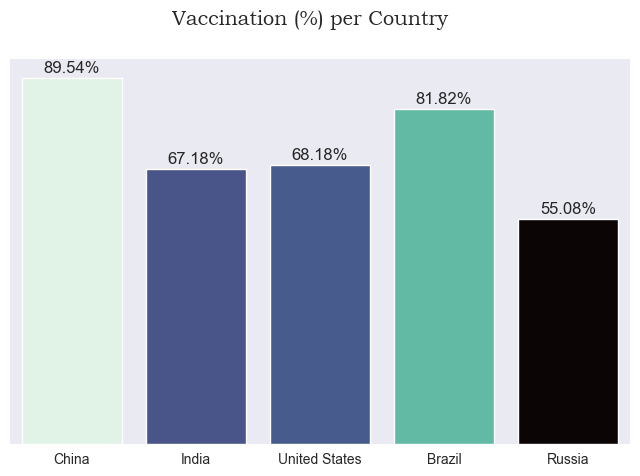

In [59]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(8,5))
sns.barplot(data = population_per,x = 'location',y = 'pct',hue = 'pct',palette='mako')
plt.xticks(fontsize = 10)
plt.legend().set_visible(False)
plt.suptitle('Vaccination (%) per Country',fontfamily = 'Bookman Old Style')
ax = plt.gca()
plt.yticks([])
plt.xlabel("")
plt.ylabel("")
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f%%', label_type='edge', padding=2)


In [44]:
from matplotlib import font_manager
fonts = sorted(set(f.name for f in font_manager.fontManager.ttflist))
fonts


['Agency FB',
 'Algerian',
 'Arial',
 'Arial Rounded MT Bold',
 'Bahnschrift',
 'Baskerville Old Face',
 'Bauhaus 93',
 'Bell MT',
 'Berlin Sans FB',
 'Berlin Sans FB Demi',
 'Bernard MT Condensed',
 'Blackadder ITC',
 'Bodoni MT',
 'Book Antiqua',
 'Bookman Old Style',
 'Bookshelf Symbol 7',
 'Bradley Hand ITC',
 'Britannic Bold',
 'Broadway',
 'Brush Script MT',
 'Calibri',
 'Californian FB',
 'Calisto MT',
 'Cambria',
 'Candara',
 'Castellar',
 'Centaur',
 'Century',
 'Century Gothic',
 'Century Schoolbook',
 'Chiller',
 'Colonna MT',
 'Comic Sans MS',
 'Consolas',
 'Constantia',
 'Cooper Black',
 'Copperplate Gothic Bold',
 'Copperplate Gothic Light',
 'Corbel',
 'Courier New',
 'Curlz MT',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'Dubai',
 'Ebrima',
 'Edwardian Script ITC',
 'Elephant',
 'Engravers MT',
 'Eras Bold ITC',
 'Eras Demi ITC',
 'Eras Light ITC',
 'Eras Medium ITC',
 'Felix Titling',
 'Font Awesome 5 Brands'

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24795 entries, 0 to 24794
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 24795 non-null  object 
 1   date                     24795 non-null  object 
 2   total_cases              23436 non-null  float64
 3   new_cases                21810 non-null  float64
 4   total_deaths             23436 non-null  float64
 5   new_deaths               22250 non-null  float64
 6   people_vaccinated        22371 non-null  float64
 7   people_fully_vaccinated  22386 non-null  float64
 8   population               24795 non-null  int64  
 9   year                     23121 non-null  float64
 10  year_month               24795 non-null  object 
dtypes: float64(7), int64(1), object(3)
memory usage: 2.1+ MB
